### Human Resources Department

URL: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

Aim: 
- Leverage power of Data Science to reduce employees turnover. 
- Need to figure out why employees leave and what we could do differently to avoid that.
- Predict if an employee is more likely to leave or not.

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

pd.set_option("display.max_columns", 100)

In [61]:
employee_df = pd.read_csv("Human_Resources.csv")
employee_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [62]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

26 columns are integer, and 9 columns are string data types.

In [63]:
employee_df.describe().round(1)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0
mean,36.9,802.5,9.2,2.9,1.0,1024.9,2.7,65.9,2.7,2.1,2.7,6502.9,14313.1,2.7,15.2,3.2,2.7,80.0,0.8,11.3,2.8,2.8,7.0,4.2,2.2,4.1
std,9.1,403.5,8.1,1.0,0.0,602.0,1.1,20.3,0.7,1.1,1.1,4708.0,7117.8,2.5,3.7,0.4,1.1,0.0,0.9,7.8,1.3,0.7,6.1,3.6,3.2,3.6
min,18.0,102.0,1.0,1.0,1.0,1.0,1.0,30.0,1.0,1.0,1.0,1009.0,2094.0,0.0,11.0,3.0,1.0,80.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,30.0,465.0,2.0,2.0,1.0,491.2,2.0,48.0,2.0,1.0,2.0,2911.0,8047.0,1.0,12.0,3.0,2.0,80.0,0.0,6.0,2.0,2.0,3.0,2.0,0.0,2.0
50%,36.0,802.0,7.0,3.0,1.0,1020.5,3.0,66.0,3.0,2.0,3.0,4919.0,14235.5,2.0,14.0,3.0,3.0,80.0,1.0,10.0,3.0,3.0,5.0,3.0,1.0,3.0
75%,43.0,1157.0,14.0,4.0,1.0,1555.8,4.0,83.8,3.0,3.0,4.0,8379.0,20461.5,4.0,18.0,3.0,4.0,80.0,1.0,15.0,3.0,3.0,9.0,7.0,3.0,7.0
max,60.0,1499.0,29.0,5.0,1.0,2068.0,4.0,100.0,4.0,5.0,4.0,19999.0,26999.0,9.0,25.0,4.0,4.0,80.0,3.0,40.0,6.0,4.0,40.0,18.0,15.0,17.0


##### Exploratory Data Analysis

In [64]:
employee_df["AttritionEncoded"] = employee_df["Attrition"].apply(
    lambda x: 1 if x == "Yes" else 0
)
employee_df["Over18Encoded"] = employee_df["Over18"].apply(
    lambda x: 1 if x == "Y" else 0
)
employee_df["OverTimeEncoded"] = employee_df["OverTime"].apply(
    lambda x: 1 if x == "Yes" else 0
)
employee_df[
    [
        "Attrition",
        "AttritionEncoded",
        "Over18",
        "Over18Encoded",
        "OverTime",
        "OverTimeEncoded",
    ]
]

,Attrition,AttritionEncoded,Over18,Over18Encoded,OverTime,OverTimeEncoded
0,Yes,1,Y,1,Yes,1
1,No,0,Y,1,No,0
2,Yes,1,Y,1,Yes,1
3,No,0,Y,1,Yes,1
4,No,0,Y,1,No,0
...,...,...,...,...,...,...
1465,No,0,Y,1,No,0
1466,No,0,Y,1,No,0
1467,No,0,Y,1,Yes,1
1468,No,0,Y,1,No,0


<Axes: >

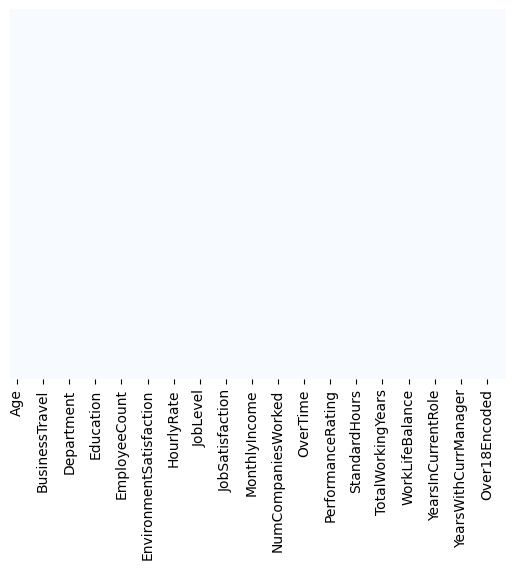

In [65]:
sns.heatmap(employee_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EmployeeCount'}>],
       [<Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobLevel'}>],
       [<Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>],
       [<Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'RelationshipSatisfaction'}>,
        <Axes: title={'center': 'StandardHours'}>,
        <Axes: title={'center': 'StockOptionLevel'}>,
        <Axe

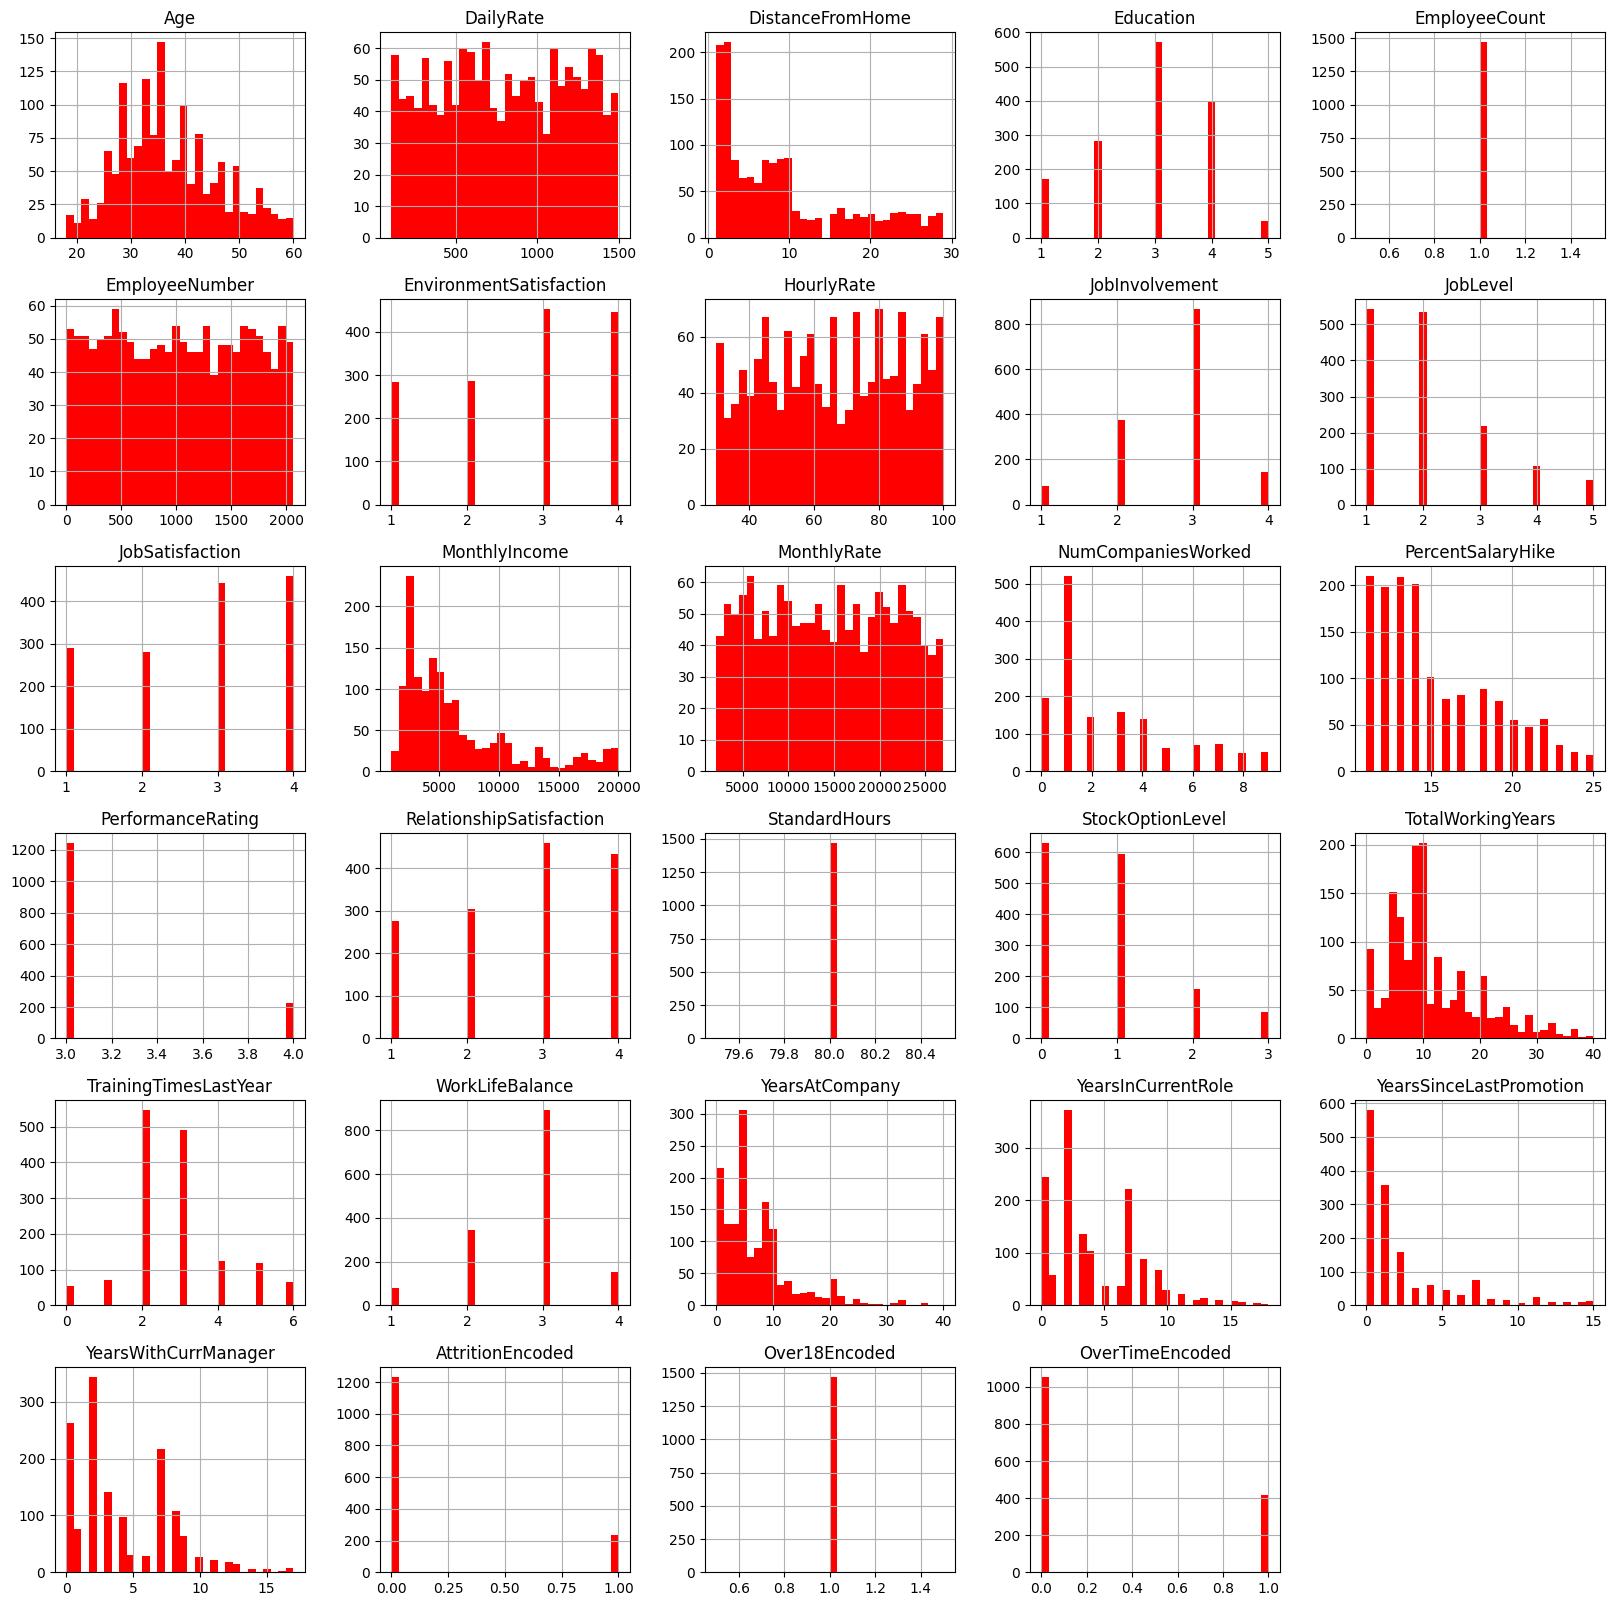

In [66]:
employee_df.hist(bins=30, figsize=(20, 20), color="r")

In [67]:
columns = employee_df.columns.to_list()
print(len(columns))
delete_cols = [
    "EmployeeCount",
    "StandardHours",
    "Over18Encoded",
    "Over18",
    "OverTime",
    "Attrition",
    "EmployeeNumber",
    "Gender",
    "Department",
    "BusinessTravel",
    "MaritalStatus",
    "JobRole",
    "EducationField",
]
columns = [col for col in columns if col not in delete_cols]
print(len(columns))

38
25


In [68]:
# we can reference this for ML processable columns.
# Refer to raw without it when we'd like to for interpretability
employee_df[columns].head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AttritionEncoded,OverTimeEncoded
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,1,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,0


In [69]:
# Let's see how many employees left the company
left_df = employee_df[employee_df["AttritionEncoded"] == 1]
stayed_df = employee_df[employee_df["AttritionEncoded"] == 0]

In [70]:
total = len(employee_df)

left = len(left_df)
left_percentage = round(left / total * 100)

stayed = len(stayed_df)
stayed_percentage = round(stayed / total * 100)

print(f"Total Employees: {total}")
print(f"- Who left: {left} ({left_percentage}%)")
print(f"- Who stayed: {stayed} ({stayed_percentage}%)")

Total Employees: 1470
- Who left: 237 (16%)
- Who stayed: 1233 (84%)


In [71]:
"""
Let's compare mean and std of employees who left with those who stage
- 'Age': mean age of employees who stayed is higher compared to those who left
- 'DailyRate': Rate of employees who stayed is higher
- 'DistanceFromHome': Employees who stayed live closer to home
- 'EnvironmentSatisfaction' & 'JonSatisfaction': Employeees who stayed are generally more satisfied with their jobs
- 'StockOptionLevel': Employees who stayed tend to have higher stock option level
"""

left_df[columns].describe().round(1)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AttritionEncoded,OverTimeEncoded
count,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0,237.0
mean,33.6,750.4,10.6,2.8,2.5,65.6,2.5,1.6,2.5,4787.1,14559.3,2.9,15.1,3.2,2.6,0.5,8.2,2.6,2.7,5.1,2.9,1.9,2.9,1.0,0.5
std,9.7,401.9,8.5,1.0,1.2,20.1,0.8,0.9,1.1,3640.2,7208.2,2.7,3.8,0.4,1.1,0.9,7.2,1.3,0.8,5.9,3.2,3.2,3.1,0.0,0.5
min,18.0,103.0,1.0,1.0,1.0,31.0,1.0,1.0,1.0,1009.0,2326.0,0.0,11.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
25%,28.0,408.0,3.0,2.0,1.0,50.0,2.0,1.0,1.0,2373.0,8870.0,1.0,12.0,3.0,2.0,0.0,3.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0
50%,32.0,699.0,9.0,3.0,3.0,66.0,3.0,1.0,3.0,3202.0,14618.0,1.0,14.0,3.0,3.0,0.0,7.0,2.0,3.0,3.0,2.0,1.0,2.0,1.0,1.0
75%,39.0,1092.0,17.0,4.0,4.0,84.0,3.0,2.0,3.0,5916.0,21081.0,5.0,17.0,3.0,4.0,1.0,10.0,3.0,3.0,7.0,4.0,2.0,5.0,1.0,1.0
max,58.0,1496.0,29.0,5.0,4.0,100.0,4.0,5.0,4.0,19859.0,26999.0,9.0,25.0,4.0,4.0,3.0,40.0,6.0,4.0,40.0,15.0,15.0,14.0,1.0,1.0


In [72]:
stayed_df[columns].describe().round(1)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AttritionEncoded,OverTimeEncoded
count,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0,1233.0
mean,37.6,812.5,8.9,2.9,2.8,66.0,2.8,2.1,2.8,6832.7,14265.8,2.6,15.2,3.2,2.7,0.8,11.9,2.8,2.8,7.4,4.5,2.2,4.4,0.0,0.2
std,8.9,403.2,8.0,1.0,1.1,20.4,0.7,1.1,1.1,4818.2,7102.3,2.5,3.6,0.4,1.1,0.8,7.8,1.3,0.7,6.1,3.6,3.2,3.6,0.0,0.4
min,18.0,102.0,1.0,1.0,1.0,30.0,1.0,1.0,1.0,1051.0,2094.0,0.0,11.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,31.0,477.0,2.0,2.0,2.0,48.0,2.0,1.0,2.0,3211.0,7973.0,1.0,12.0,3.0,2.0,0.0,6.0,2.0,2.0,3.0,2.0,0.0,2.0,0.0,0.0
50%,36.0,817.0,7.0,3.0,3.0,66.0,3.0,2.0,3.0,5204.0,14120.0,2.0,14.0,3.0,3.0,1.0,10.0,3.0,3.0,6.0,3.0,1.0,3.0,0.0,0.0
75%,43.0,1176.0,13.0,4.0,4.0,83.0,3.0,3.0,4.0,8834.0,20364.0,4.0,18.0,3.0,4.0,1.0,16.0,3.0,3.0,10.0,7.0,3.0,7.0,0.0,0.0
max,60.0,1499.0,29.0,5.0,4.0,100.0,4.0,5.0,4.0,19999.0,26997.0,9.0,25.0,4.0,4.0,3.0,38.0,6.0,4.0,37.0,18.0,15.0,17.0,0.0,1.0


<Axes: >

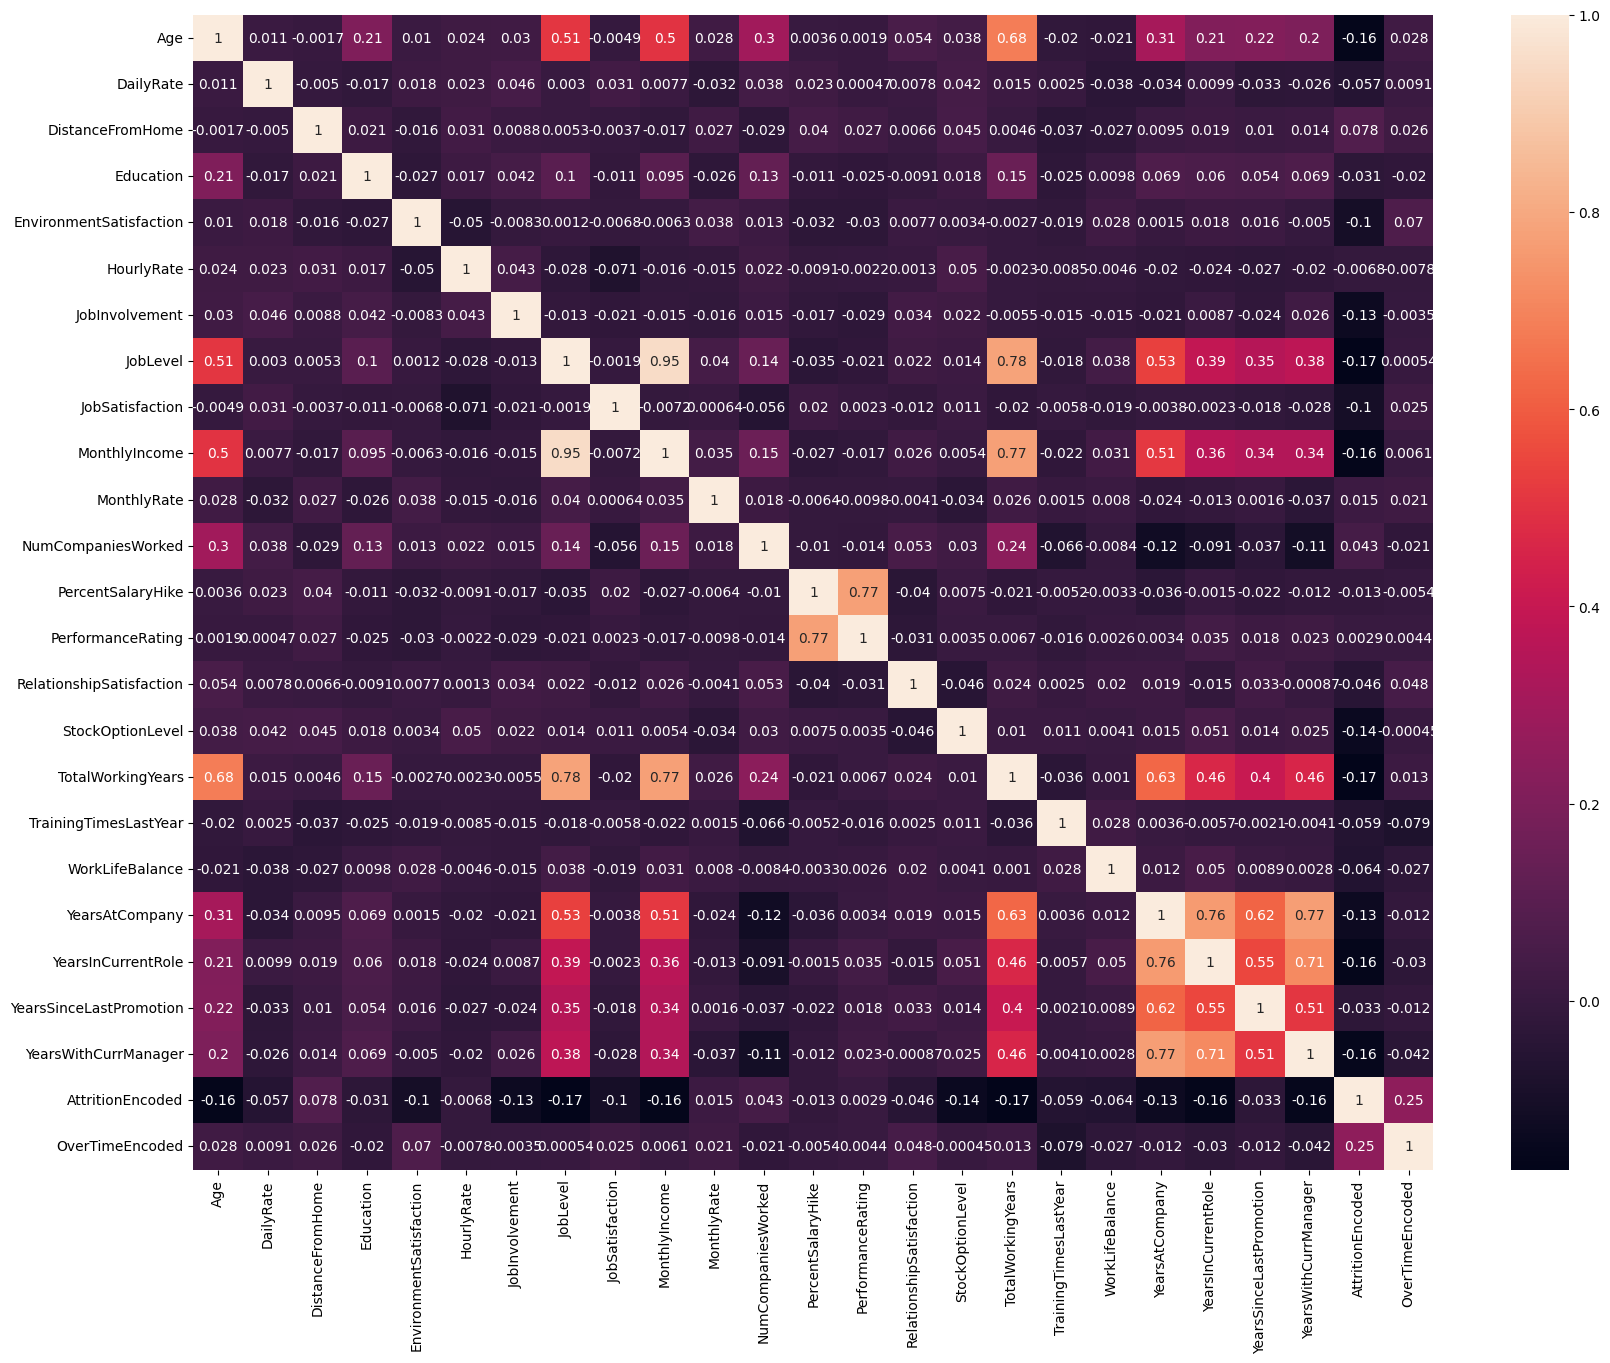

In [73]:
"""
The correlations highlight that employees with more experience have higher salary and responsibility in the company.
- Job level is strongly correlated with total working hours.
- TotalWorkingYears strongly correlated with JobLevel.
- TotalWorkingYears strongly correlated with MonthlyIncome. 
- More years at a company, higher toal income.
- Age strongly correlates with monthly income.
"""

correlations = employee_df[columns].corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(correlations, annot=True)

<Axes: xlabel='Age', ylabel='count'>

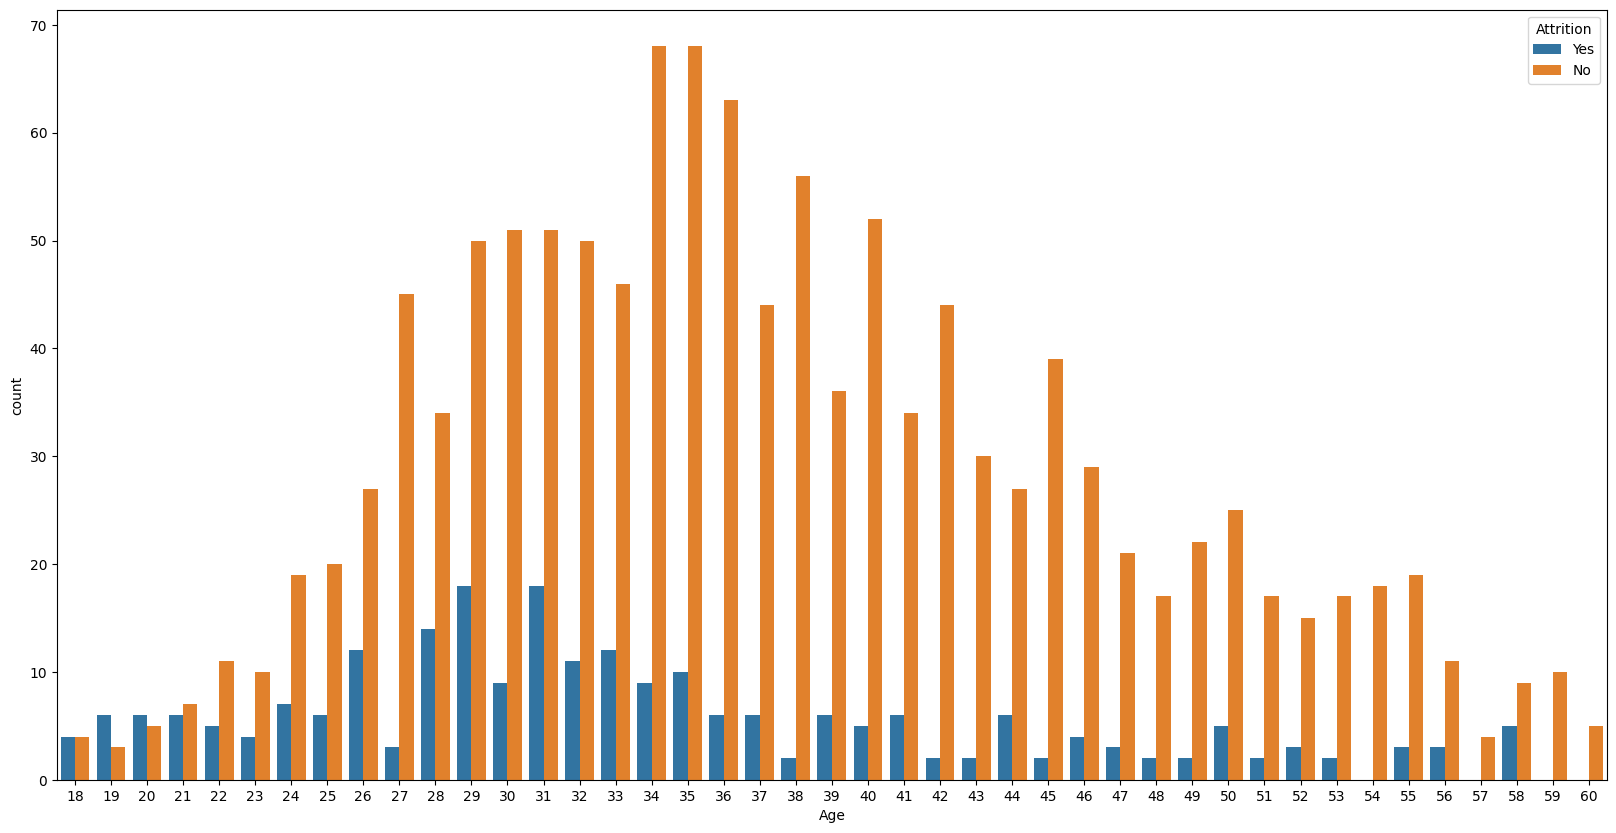

In [74]:
plt.figure(figsize=(20, 10))
sns.countplot(x="Age", hue="Attrition", data=employee_df)

People around 30 seem quite likely to leave their job positions as indicated by the massive imbalance between those who stayed and left.
- This could be a factor of employees looking for substantial boosts in their salary as they start saving up for property and starting families
- The attrition is most balanced for people from 18-21 as they are at the beginning of their career progression. The value of job experience at a young age out weighs the need for immediate compinsation.
- Imbalance is still present from 40 onwards, however the significance of people leaving decreases. As people settle down, also with responsibilities of handling bank loans and dependants they take less risk in switching jobs

<Axes: xlabel='JobLevel', ylabel='count'>

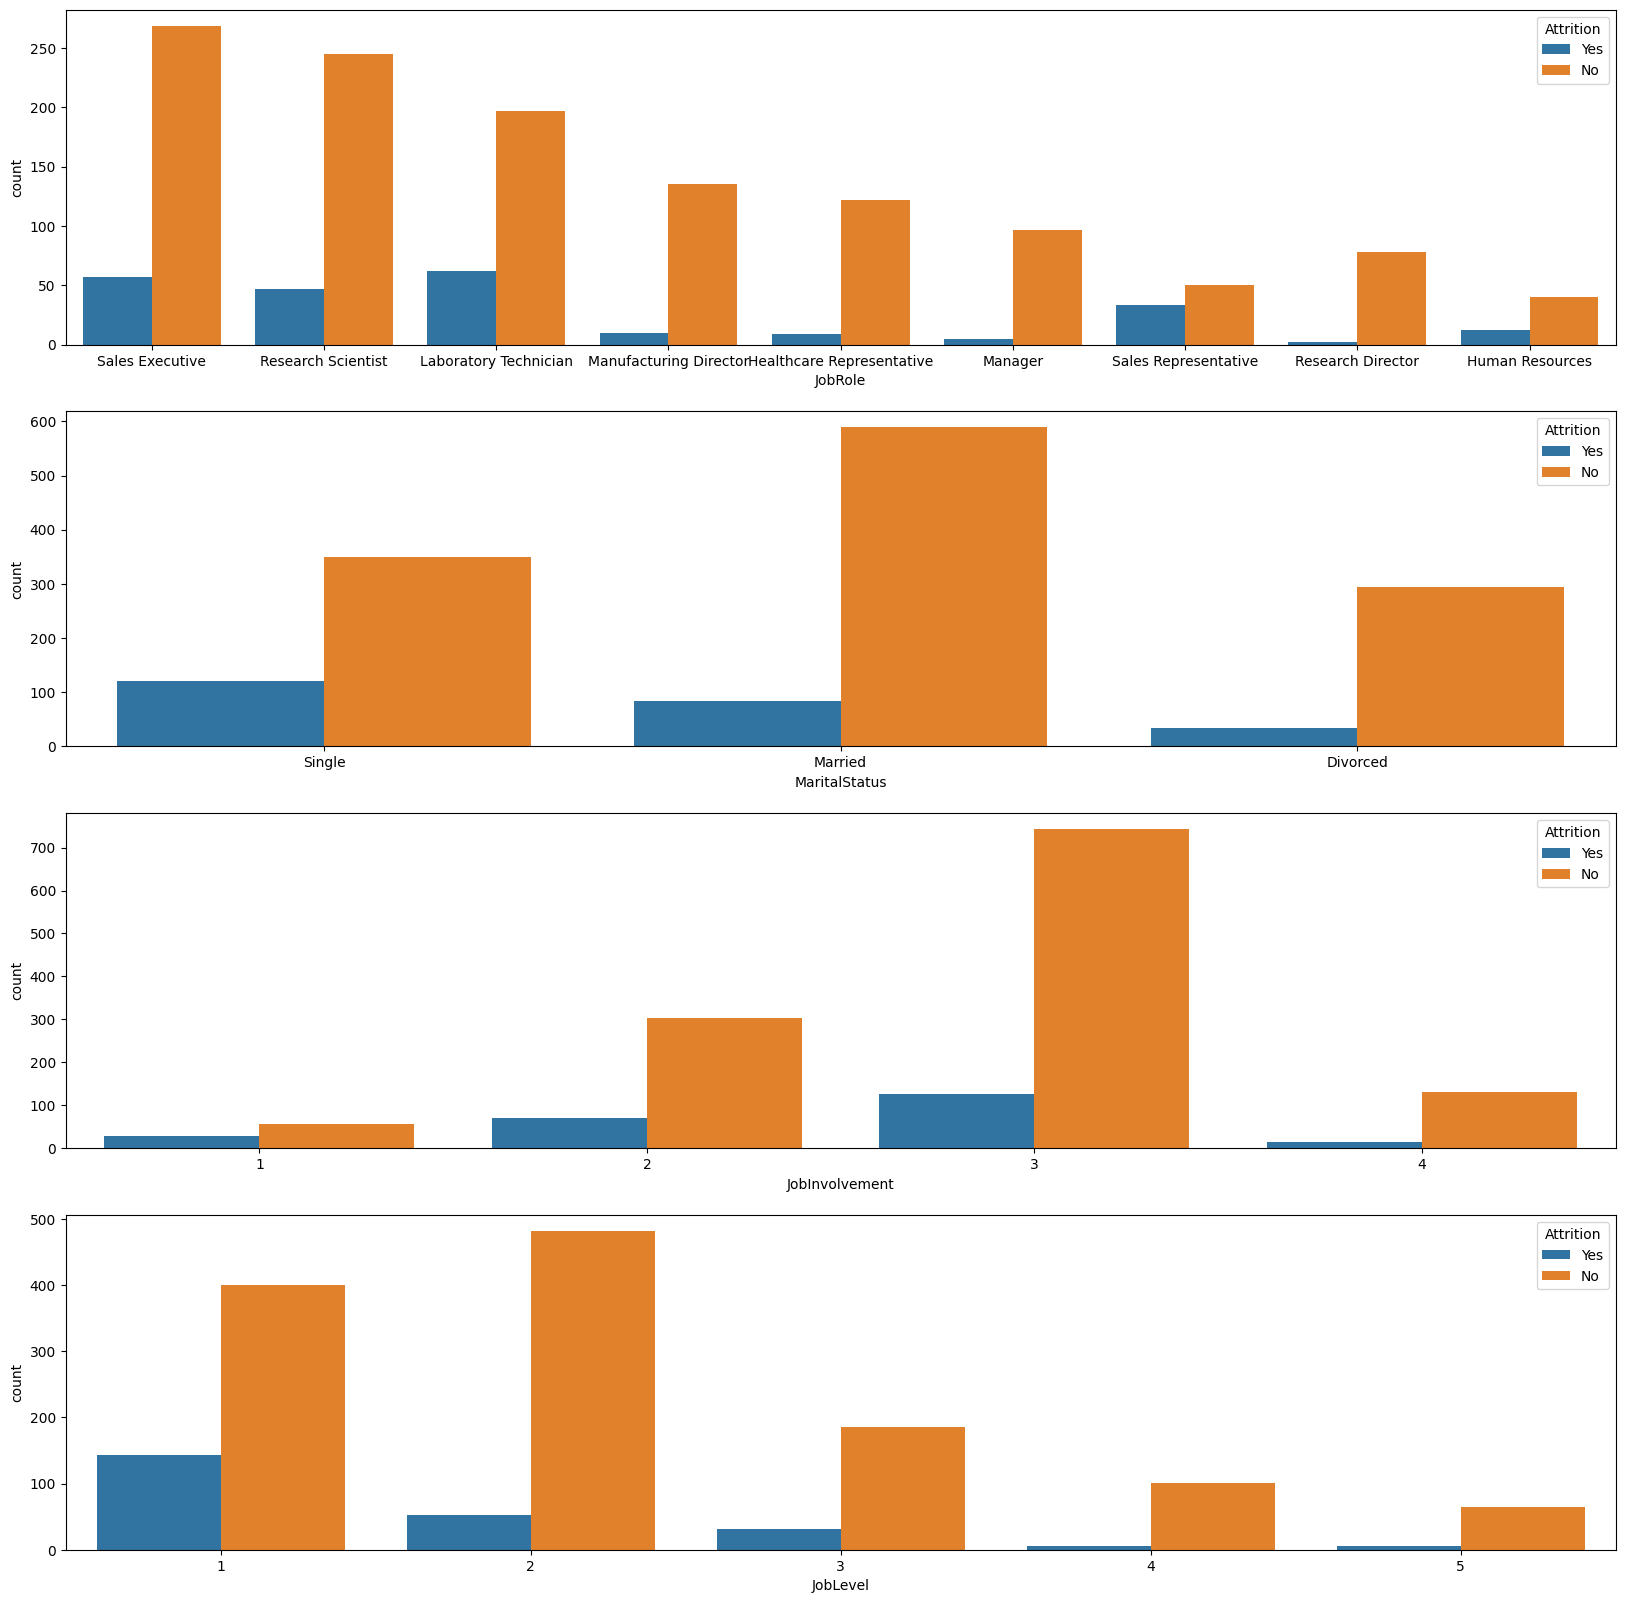

In [75]:
plt.figure(figsize=(20, 20))

plt.subplot(411)
sns.countplot(x="JobRole", hue="Attrition", data=employee_df)

plt.subplot(412)
sns.countplot(x="MaritalStatus", hue="Attrition", data=employee_df)

plt.subplot(413)
sns.countplot(x="JobInvolvement", hue="Attrition", data=employee_df)

plt.subplot(414)
sns.countplot(x="JobLevel", hue="Attrition", data=employee_df)

Comparing ratio of people who left (blue) vs people who stayed (orange) across categories:
- Research Director has a particularly low attrition percentage. Possibly from high salary compared to other roles. Sales Representatives meanwhile have high attrition. Possibly because not as well paid, and a lot of roles are available in the industry for sales.
- Single people have higher attrition possibly due to less financial responsabilities allowing them to take more risk. It is lower for married, and even lower for divorced.
- The higher the job involvement the lower the attrition. People who feel like their skillset is being put to the use are more likely to stay.
- The higher the job level the lower the attrition. People with more responsibility and pay have less insentive to find jobs elsewhere.

Text(0.5, 0, 'Distance from home')

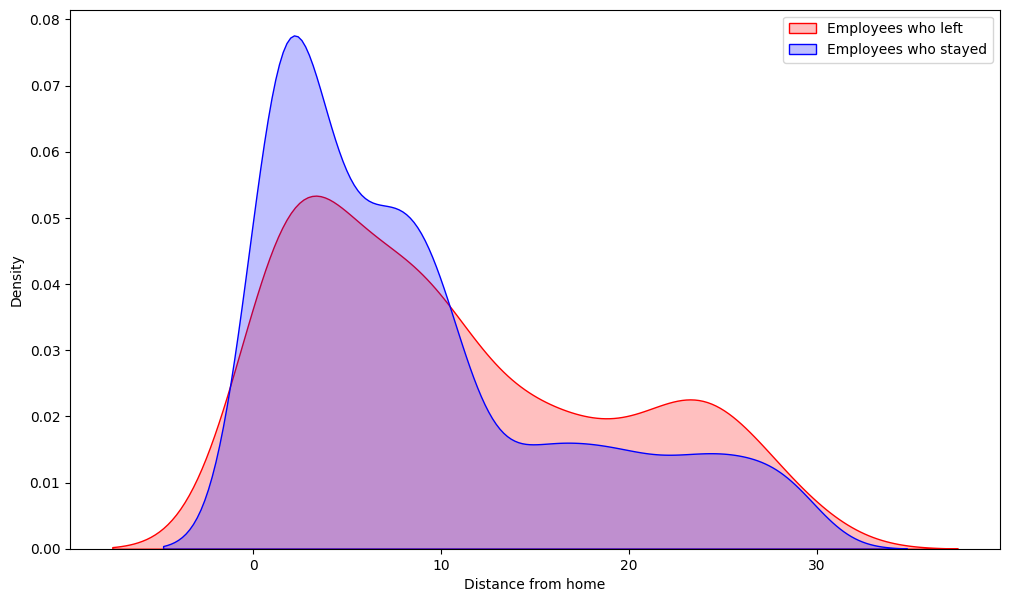

In [76]:
plt.figure(figsize=(12, 7))
sns.kdeplot(
    left_df["DistanceFromHome"], label="Employees who left", fill=True, color="red"
)
sns.kdeplot(
    stayed_df["DistanceFromHome"],
    label="Employees who stayed",
    fill=True,
    color="blue",
)
plt.legend()
plt.xlabel("Distance from home")

- The shorter the distance from home to office, the more employees stay as indicated by the peak in the blue distribution.
- As distance gets longer we notice a secondary hump higher for red, indicating people who left are further from office

Text(0.5, 0, 'Years with Current Manager')

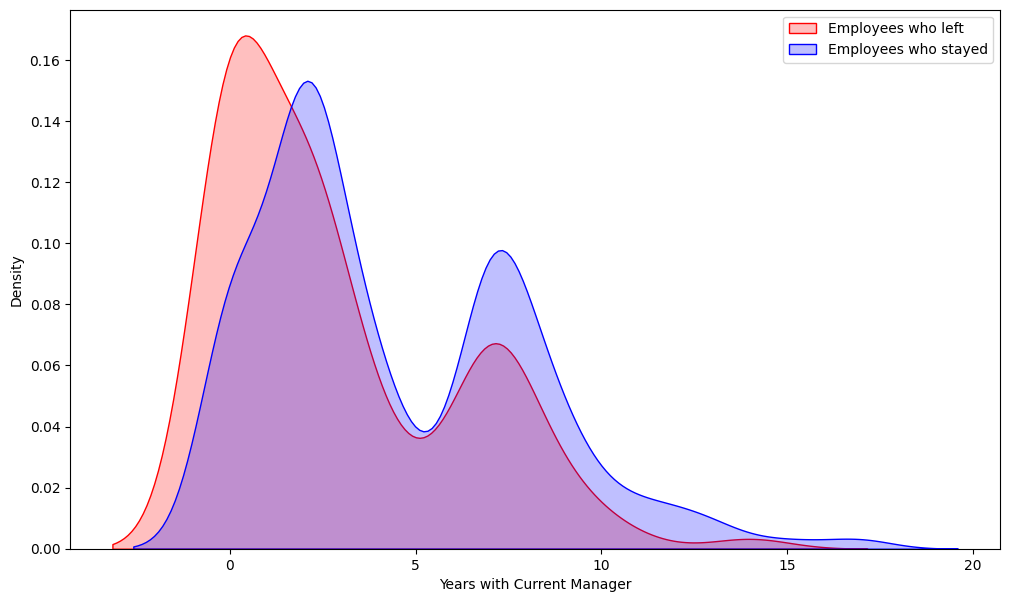

In [77]:
plt.figure(figsize=(12, 7))
sns.kdeplot(
    left_df["YearsWithCurrManager"],
    label="Employees who left",
    fill=True,
    color="red",
)
sns.kdeplot(
    stayed_df["YearsWithCurrManager"],
    label="Employees who stayed",
    fill=True,
    color="blue",
)
plt.legend()
plt.xlabel("Years with Current Manager")

- People who left have less years with current manager as indicated by the first peak for red. People who stayed have more years with current manager as indicated by second peak for blue. 
- Blue tail is also longer, indicated those who stayed tend to stay with current manager.
- It seems that people who have been longer to their current managers are more loyal to stay at the company.

Text(0.5, 0, 'Total Working Years')

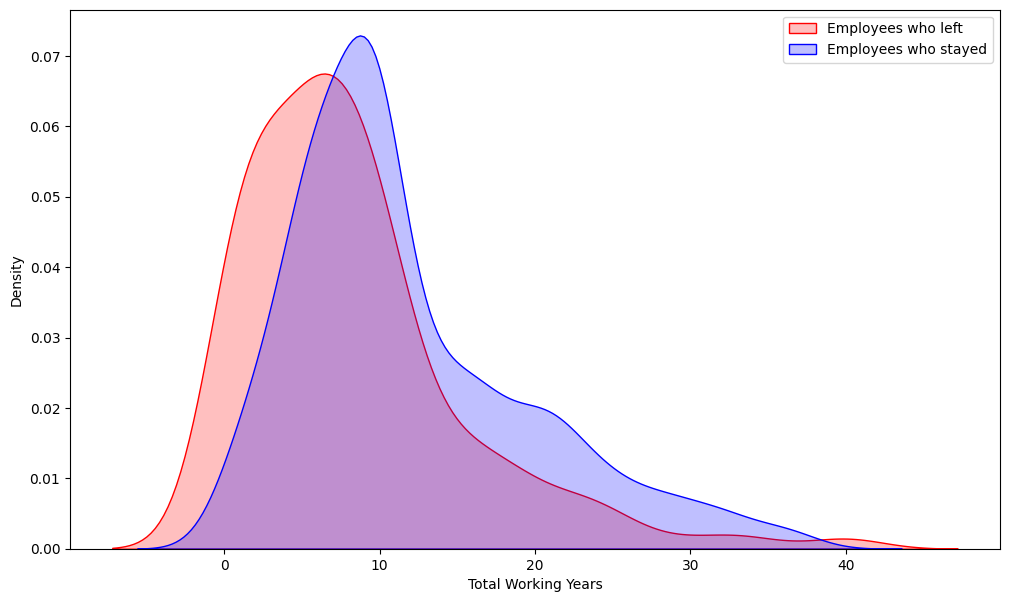

In [78]:
plt.figure(figsize=(12, 7))
sns.kdeplot(
    left_df["TotalWorkingYears"],
    label="Employees who left",
    fill=True,
    color="red",
)
sns.kdeplot(
    stayed_df["TotalWorkingYears"],
    label="Employees who stayed",
    fill=True,
    color="blue",
)
plt.legend()
plt.xlabel("Total Working Years")

- Employees who stayed seem to have a more total working years as indicated by the higher blue peak, reflecting their loyalty to stay at the company. 
- Employees start leaving with less total working years. This could be because they decide they are not a right fit for the company on first impression, or they feel less obliged to stay as they are quite new and typically not assigned so much responsibility right of the bat.
- Employees tend to stay the longer they work at the company.

/tmp/ipykernel_67077/3800058920.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="MonthlyIncome", y="Gender", data=employee_df, palette="Blues")


<Axes: xlabel='MonthlyIncome', ylabel='Gender'>

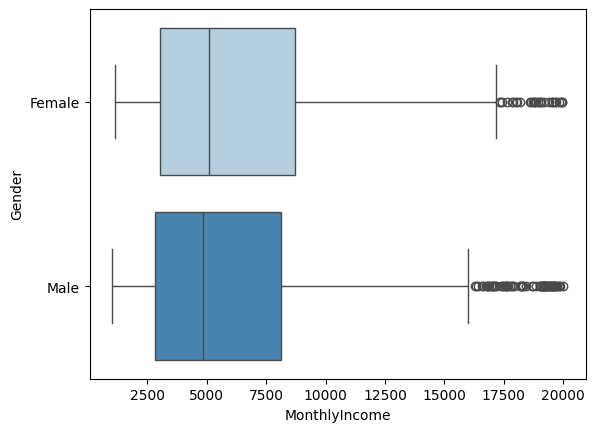

In [79]:
sns.boxplot(x="MonthlyIncome", y="Gender", data=employee_df, palette="Blues")

Average is quite comparable between main and female. There is a pay equality. It even seems that female employees tend to get payed more at this company, which is great.

/tmp/ipykernel_67077/791281666.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="MonthlyIncome", y="JobRole", data=employee_df, palette="Blues")


<Axes: xlabel='MonthlyIncome', ylabel='JobRole'>

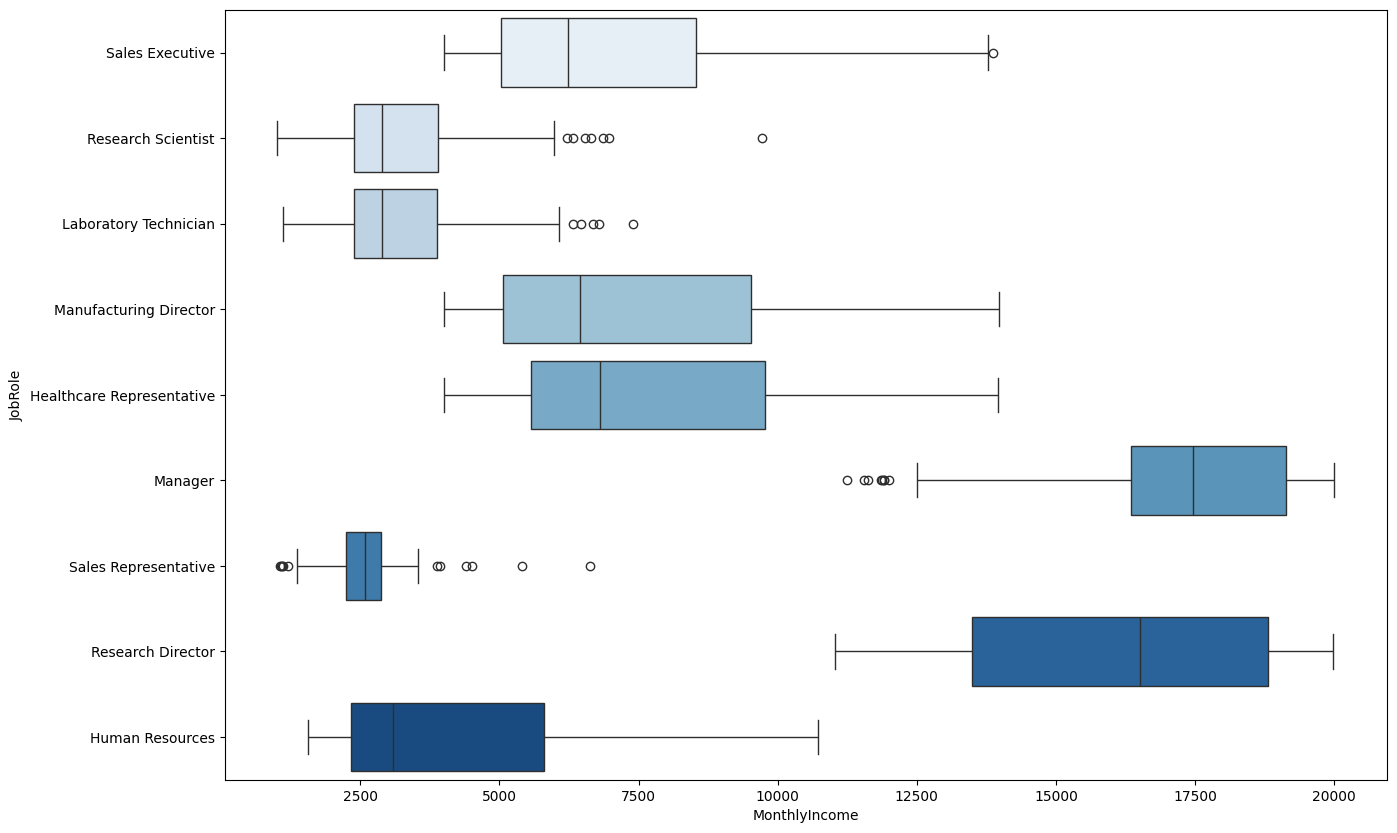

In [80]:
plt.figure(figsize=(15, 10))
sns.boxplot(x="MonthlyIncome", y="JobRole", data=employee_df, palette="Blues")

- Managers and Research Directors get paid a lot more
- Sales Representative get paid a lot less

#### Data Preprocessing for Preparing Training and Testing Sets

In [81]:
employee_df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AttritionEncoded,Over18Encoded,OverTimeEncoded
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1,1,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1,1,1


In [82]:
X_cat = employee_df[
    [
        "BusinessTravel",
        "Department",
        "EducationField",
        "Gender",
        "JobRole",
        "MaritalStatus",
    ]
]
X_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [83]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()
X_cat

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [84]:
X_cat = pd.DataFrame(X_cat)
X_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [85]:
employee_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'AttritionEncoded', 'Over18Encoded',
       'OverTimeEncoded'],
      dtype='object')

In [86]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [174]:
X_numerical = employee_df[
    [
        "Age",
        "DailyRate",
        "DistanceFromHome",
        "Education",
        "EmployeeCount",
        "EmployeeNumber",
        "EnvironmentSatisfaction",
        "HourlyRate",
        "JobInvolvement",
        "JobLevel",
        "JobSatisfaction",
        "MonthlyIncome",
        "MonthlyRate",
        "NumCompaniesWorked",
        "PercentSalaryHike",
        "PerformanceRating",
        "RelationshipSatisfaction",
        "StandardHours",
        "StockOptionLevel",
        "TotalWorkingYears",
        "TrainingTimesLastYear",
        "WorkLifeBalance",
        "YearsAtCompany",
        "YearsInCurrentRole",
        "YearsSinceLastPromotion",
        "YearsWithCurrManager",
        "OverTimeEncoded",
    ]
]
X_numerical.head(3)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,OverTimeEncoded
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,1
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,0
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,1


In [175]:
X_all = pd.concat([X_cat, X_numerical], axis=1)
X_all.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,OverTimeEncoded
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,1
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,1


In [176]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X_all.values)
X

array([[0.        , 0.        , 1.        , ..., 0.        , 0.29411765,
        1.        ],
       [0.        , 1.        , 0.        , ..., 0.06666667, 0.41176471,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.        , 0.17647059,
        1.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.47058824,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.06666667, 0.11764706,
        0.        ]])

In [177]:
y = employee_df["AttritionEncoded"]
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: AttritionEncoded, Length: 1470, dtype: int64

In [238]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)
print(X_train.shape)
print(X_test.shape)

(1102, 53)
(368, 53)


In [282]:
from imblearn.over_sampling import SMOTE

print(X_train.shape, y_train.shape)
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print(X_train_res.shape, y_train_res.shape)


(1102, 53) (1102,)
(1826, 53) (1826,)


#### Training Logistic Regression Classifier

In [350]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

model_lr = LogisticRegression(n_jobs=-1)
model_lr.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

In [351]:
y_pred = model_lr.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

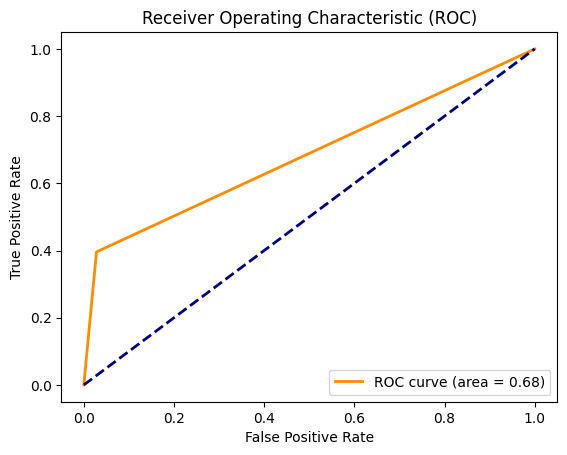

In [352]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming y_pred contains probabilities instead of predicted classes
fpr, tpr, thresholds = roc_curve(y_test, y_pred)  # y_pred should contain probabilities
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [271]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       320
           1       0.68      0.40      0.50        48

    accuracy                           0.90       368
   macro avg       0.80      0.68      0.72       368
weighted avg       0.88      0.90      0.88       368



#### Training Random Forest Classifier

In [385]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42, criterion='log_loss', bootstrap=True)
model.fit(X_train_res, y_train_res)

RandomForestClassifier(criterion='log_loss', random_state=42)

In [400]:
y_pred = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred >= 0.6)
y_pred[:5]

array([False, False, False, False, False])

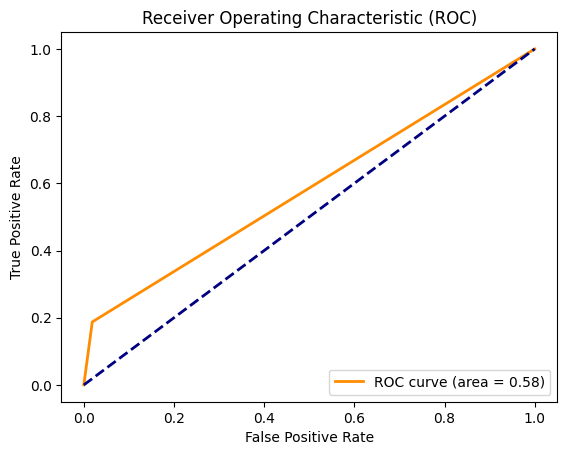

In [387]:
# Assuming y_pred contains probabilities instead of predicted classes
fpr, tpr, thresholds = roc_curve(y_test, y_pred)  # y_pred should contain probabilities
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [401]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.94       320
           1       0.75      0.12      0.21        48

    accuracy                           0.88       368
   macro avg       0.82      0.56      0.57       368
weighted avg       0.87      0.88      0.84       368



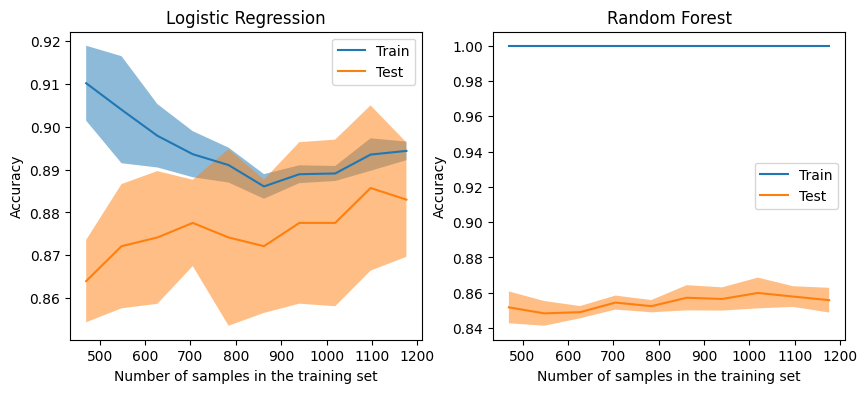

In [402]:
from sklearn.model_selection import LearningCurveDisplay

train_sizes = np.linspace(0.4, 1.0, 10)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
LearningCurveDisplay.from_estimator(
    model_lr, X, y, train_sizes=train_sizes, ax=axes[0], scoring="accuracy"
)
axes[0].set_title("Logistic Regression")

LearningCurveDisplay.from_estimator(
    model, X, y, train_sizes=train_sizes, ax=axes[1], scoring="accuracy"
)
axes[1].set_title("Random Forest")
plt.show()

Random Forest performed a lot worse than logistic regression as it overfitted. It merely memorised the samples in training not learnt it.

#### XGBoost Classifier

In [283]:
from sklearn.ensemble import  GradientBoostingClassifier

seed=0
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0}

model = GradientBoostingClassifier(**gb_params)
model.fit(X_train_res, y_train_res)
y_pred = model.predict(X_test)


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       320
           1       0.67      0.38      0.48        48

    accuracy                           0.89       368
   macro avg       0.79      0.67      0.71       368
weighted avg       0.88      0.89      0.88       368



#### Training Deep Learning Model

In [341]:
X_train_res.shape

(1826, 53)

In [342]:
import tensorflow as tf

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=500, activation="relu", input_shape=(53,)))
model.add(tf.keras.layers.Dense(units=500, activation="relu"))
model.add(tf.keras.layers.Dense(units=500, activation="relu"))
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

/home/russellsb/.cache/pypoetry/virtualenvs/data_science_for_business_package-muNh-jkR-py3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [343]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                │ (None, 500)            │        27,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 1)              │           501 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 528,501 (2.02 MB)

 Trainable params: 528,501 (2.02 MB)

 Non-trainable params: 0 (0.00 B)

In [344]:
model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

In [345]:
epochs_hist = model.fit(X_train_res, y_train_res, epochs=100, batch_size=50)

Epoch 1/100


37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6949 - loss: 0.5693
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8573 - loss: 0.3436
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8922 - loss: 0.2495
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9441 - loss: 0.1800
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9571 - loss: 0.1227
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9724 - loss: 0.0763
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9538 - loss: 0.1261
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9912 - loss: 0.0339
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9958 - loss: 0.0187
Epoch 10/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9975 - loss: 0.0112
Epoch 11/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0037
Epoch 12/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - l

In [346]:
y_pred = model.predict(X_test)
y_pred = y_pred > 0.5
y_pred[:5]

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


array([[False],
       [False],
       [False],
       [False],
       [False]])

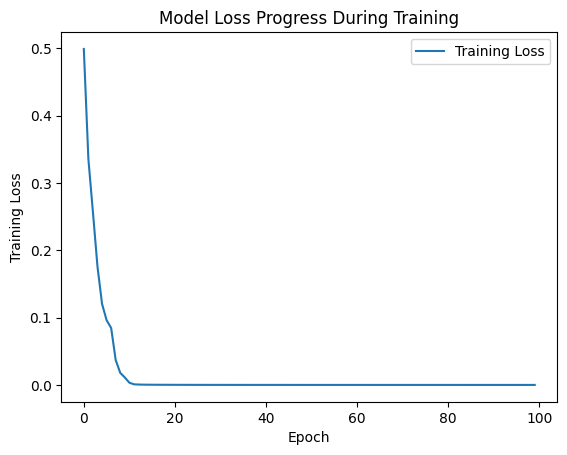

In [347]:
plt.plot(epochs_hist.history["loss"])
plt.title("Model Loss Progress During Training")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend(["Training Loss"])

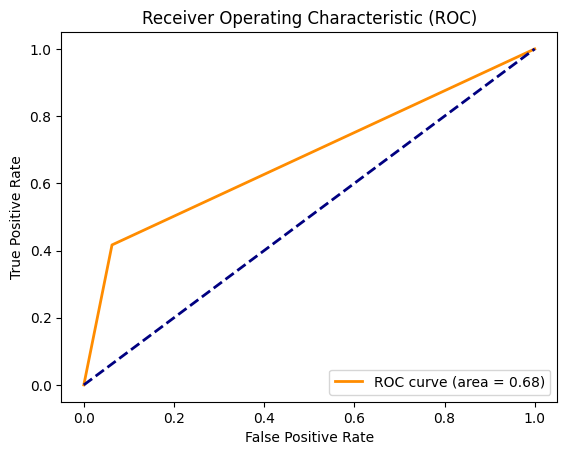

In [348]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming y_pred contains probabilities instead of predicted classes
fpr, tpr, thresholds = roc_curve(y_test, y_pred)  # y_pred should contain probabilities
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [349]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       320
           1       0.50      0.42      0.45        48

    accuracy                           0.87       368
   macro avg       0.71      0.68      0.69       368
weighted avg       0.86      0.87      0.86       368

